<a href="https://colab.research.google.com/github/hublun/TWSApi/blob/master/IBApi_Historical_Data20201122_20201127.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import scipy.stats as stat
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
df = pd.read_pickle('/content/drive/MyDrive/TWS/M2K_20201122_to_20201127162500.pkl')

In [138]:
df["Time"] = pd.to_datetime(df["time"], format='%Y%m%d  %H:%M:%S', yearfirst=True)

In [139]:
df.drop('time', axis=1, inplace=True)

In [140]:
df["Hour"] = pd.DatetimeIndex(df["Time"]).hour
df["Minute"] = pd.DatetimeIndex(df["Time"]).minute
df["Second"] = pd.DatetimeIndex(df["Time"]).second
df["Day"] = pd.DatetimeIndex(df["Time"]).day

In [141]:
initialDateTime = df.Time[0]
initialDateTime

Timestamp('2020-11-22 18:00:00')

In [142]:
df["TradeDay"] = pd.TimedeltaIndex(df.Time - initialDateTime).days

In [143]:
df.head()

,open,high,low,close,avg,vol,Time,Hour,Minute,Second,Day,TradeDay
0,1782.3,1782.8,1778.1,1779.4,1780.21,106,2020-11-22 18:00:00,18,0,0,22,0
1,1779.8,1779.9,1777.1,1777.9,1778.27,60,2020-11-22 18:01:00,18,1,0,22,0
2,1778.0,1779.0,1776.7,1778.7,1777.52,44,2020-11-22 18:02:00,18,2,0,22,0
3,1778.5,1779.2,1778.5,1778.9,1778.85,27,2020-11-22 18:03:00,18,3,0,22,0
4,1778.8,1779.5,1778.4,1779.2,1778.95,40,2020-11-22 18:04:00,18,4,0,22,0


In [144]:
df.avg.rolling(10, min_periods=1).mean()

0       1780.210000
1       1779.240000
2       1778.666667
3       1778.712500
4       1778.760000
           ...     
6385    1853.294000
6386    1853.147000
6387    1853.032000
6388    1852.944000
6389    1853.204000
Name: avg, Length: 6390, dtype: float64

In [165]:
df["mu30min"] = df.avg.rolling(window=30, min_periods=1).mean()
df["mu10min"] = df.avg.rolling(window=10, min_periods=1).mean()

df["mu5min"] = df.avg.rolling(window=2, min_periods=1).mean()
df["mu2min"] = df.avg.rolling(window=2, min_periods=1).mean()
df["dev"] = df.close - df.open

df["delta2m"] = df.avg - df.mu2min
df["delta5m"] = df.avg - df.mu5min
df["delta10m"] = df.avg - df.mu10min
df["delta30m"] = df.avg - df.mu30min

In [146]:
df.head()

,open,high,low,close,avg,vol,Time,Hour,Minute,Second,Day,TradeDay,mu30min,mu10min,mu5min,mu2min,dev
0,1782.3,1782.8,1778.1,1779.4,1780.21,106,2020-11-22 18:00:00,18,0,0,22,0,1780.210000,1780.210000,1780.210,1780.210,-2.9
1,1779.8,1779.9,1777.1,1777.9,1778.27,60,2020-11-22 18:01:00,18,1,0,22,0,1779.240000,1779.240000,1779.240,1779.240,-1.9
2,1778.0,1779.0,1776.7,1778.7,1777.52,44,2020-11-22 18:02:00,18,2,0,22,0,1778.666667,1778.666667,1777.895,1777.895,0.7
3,1778.5,1779.2,1778.5,1778.9,1778.85,27,2020-11-22 18:03:00,18,3,0,22,0,1778.712500,1778.712500,1778.185,1778.185,0.4
4,1778.8,1779.5,1778.4,1779.2,1778.95,40,2020-11-22 18:04:00,18,4,0,22,0,1778.760000,1778.760000,1778.900,1778.900,0.4


In [ ]:

df["pbmin"] = (df.avg - df.avg.shift(periods=1)).fillna(0.0)
df["pb5min"] = (df.avg - df.avg.shift(periods=5)).fillna(0.0)
df["pb10min"] = (df.avg - df.avg.shift(periods=10)).fillna(0.0)
df["pb15min"] = (df.avg - df.avg.shift(periods=15)).fillna(0.0)
df["pb30min"] = (df.avg - df.avg.shift(periods=30)).fillna(0.0)
df.head()

In [ ]:
df["pfmin"] = (df.avg.shift(-1)-df.avg).fillna(0.0)
df["pf2min"] = (df.avg.shift(-2)-df.avg).fillna(0.0)
df["pf5min"] = (df.avg.shift(-5)-df.avg).fillna(0.0)
df["pf10min"] = (df.avg.shift(-10)-df.avg).fillna(0.0)
df["pf15min"] = (df.avg.shift(-15)-df.avg).fillna(0.0)
df.tail()

In [ ]:
a4_dims = (23,12)
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(x=df.pb10min, y=df.pfmin)

In [ ]:
df.columns[12:22]

In [181]:
df.drop(df.head(30).index, inplace=True)
df.drop(df.head(15).index, inplace=True)

In [ ]:
df.shape[0]

In [62]:
df_corr = df[df.columns[11:22]]
df_corr.drop(df_corr.head(60).index, inplace=True)
df_corr.drop(df_corr.tail(15).index, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_corr.head()

In [ ]:
df_corr.corr()

In [185]:
import statsmodels.formula.api as smf
lm = smf.ols(formula="pf10min~dev+delta5m+delta30m", data=df).fit()
lm.params
lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.013     
Dependent Variable: pf10min          AIC:                24080.2788
Date:               2020-12-05 19:01 BIC:                24107.2816
No. Observations:   6315             Log-Likelihood:     -12036.   
Df Model:           3                F-statistic:        28.95     
Df Residuals:       6311             Prob (F-statistic): 1.38e-18  
R-squared:          0.014            Scale:              2.6503    
---------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
---------------------------------------------------------------------
Intercept    0.1086     0.0206    5.2744   0.0000    0.0682    0.1489
dev          0.4375     0.0504    8.6784   0.0000    0.3387    0.5363
delta5m     -0.5291     0.1106   -4.7834   0.0000   -0.7460   -0.3123
delta30m    -0.0436     0.0137   -3.1843   0.0015   -0.0704   -0.0168
-------------------------------------------------------------------
Omnibus:             537.701       Durbin-Watson:          0.197   
Prob(Omnibus):       0.000         Jarque-Bera (JB):       3037.476
Skew:                0.184         Prob(JB):               0.000   
Kurtosis:            6.378         Condition No.:          9       
===================================================================

"""

In [59]:
"{0:.2f}%".format(100*df.pfmin[ abs(df.pfmin)< 1].shape[0]/df.shape[0])

'94.24%'

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1649: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


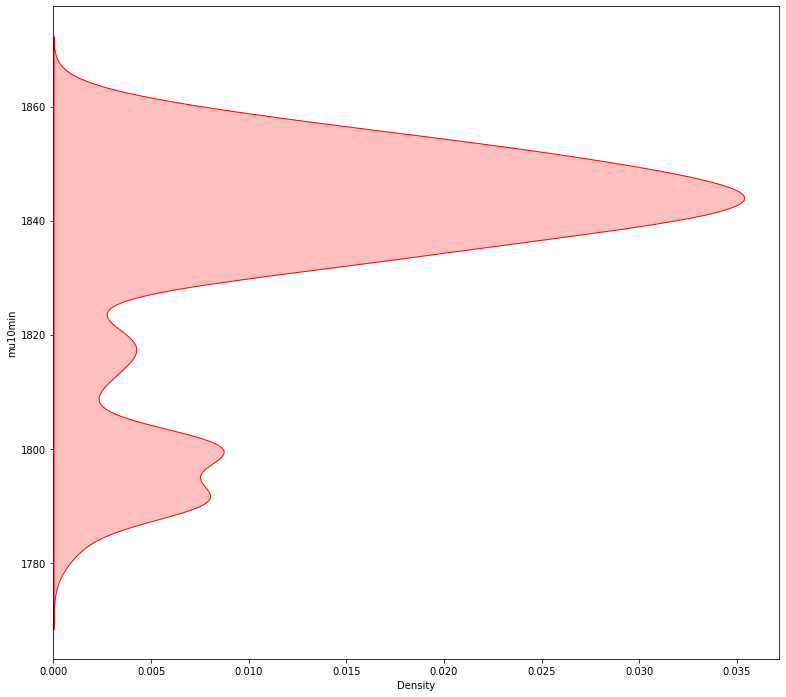

In [178]:
fig, ax = plt.subplots(figsize=a4_dims)
sns.kdeplot(df.mu10min, shade=True, vertical=True, color="red")